[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/110XwsAvyjjGKVjsenR98r4AoFohbFSZH)


## Preparing Dataset

*NOTICE: fetching Dataset is not working colab (due to sanctions or what) so I provided the corpus alongside the notebook. You can either fetch dataset using colab via connecting it to a local machine or simply use the corpus.txt .*

### Method 1: Fetching Dataset

#### Importing Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup

#### Setting URL

In [ ]:
URL = "https://ganjoor.net/moulavi/shams/ghazalsh/sh"
ghazalha = range(1501, 2001)
corpus = ""

##### Webscraping Data From Ganjoor

In [ ]:
for ghazal in ghazalha:
    page = requests.get(URL+str(ghazal))

    soup = BeautifulSoup(page.content, "html.parser")

    results = soup.find(id="garticle")

    beitha = results.find_all("div", class_="b")

    print("غزل شماره " + str(ghazal))
    for beit in beitha:
        mesra1 = beit.find("div", class_="m1")
        mesra2 = beit.find("div", class_="m2")
        print(mesra1.text)
        corpus += mesra1.text + " "
        print(mesra2.text)
        corpus += mesra2.text + " "
        print()
    print()

#### Saving Data in a Text File (optional)

In [ ]:
text_file = open("corpus.txt", "w", encoding="utf-8")
text_file.write(corpus)
text_file.close()

In [ ]:
corpus

### Method 2: Use pre-made dataset

Downloading corpus and stopwords from github

In [ ]:
!curl -o corpus.txt https://raw.githubusercontent.com/AmirHajimohamadi/nlp/master/corpus.txt

with open('corpus.txt', 'r') as file:
    corpus = file.read().rstrip()
file.close()


!curl -o stopwords.txt https://raw.githubusercontent.com/AmirHajimohamadi/nlp/master/stopwords.txt

with open('stopwords.txt', 'r') as file:
    stopwords = file.read().rstrip()
file.close()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  585k  100  585k    0     0  1170k      0 --:--:-- --:--:-- --:--:-- 1170k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6321  100  6321    0     0  40780      0 --:--:-- --:--:-- --:--:-- 40780


### Preprocessing the corpus

In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
stopwords = stopwords.replace("\n", " ")
stopwords = stopwords.split()

In [ ]:
text = corpus.split()
text = [w.replace('\u200c', '') for w in text]

Removing stopwords from the text

### Creating Word Cloud

In [ ]:
text = [w for w in text if not w in stopwords]

In [ ]:
!pip install wordcloud-fa
!curl -o mask.png https://raw.githubusercontent.com/AmirHajimohamadi/nlp/master/iran_mask.png

from wordcloud_fa import WordCloudFa
import numpy as np
from PIL import Image

     |████████████████████████████████| 71 kB 4.9 MB/s 
     |████████████████████████████████| 366 kB 18.6 MB/s 
     |████████████████████████████████| 316 kB 45.1 MB/s 
     |████████████████████████████████| 1.4 MB 43.5 MB/s 
     |████████████████████████████████| 233 kB 40.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=28cea7c66bff8b77cafc05e8a8dc1e29c471b7f6db76e5d077199749c0198501
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154297 sha256=49fc06c30a6110bba79b2b58d7068c951d093ef9f103c6562297a53944cc3b5c
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Atte

In [ ]:
mask_array = np.array(Image.open("mask.png"))
wordcloud = WordCloudFa(persian_normalize=True, mask=mask_array, scale=0.8)
wc = wordcloud.generate(' '.join([str(elem) for elem in text]))
image = wc.to_image()

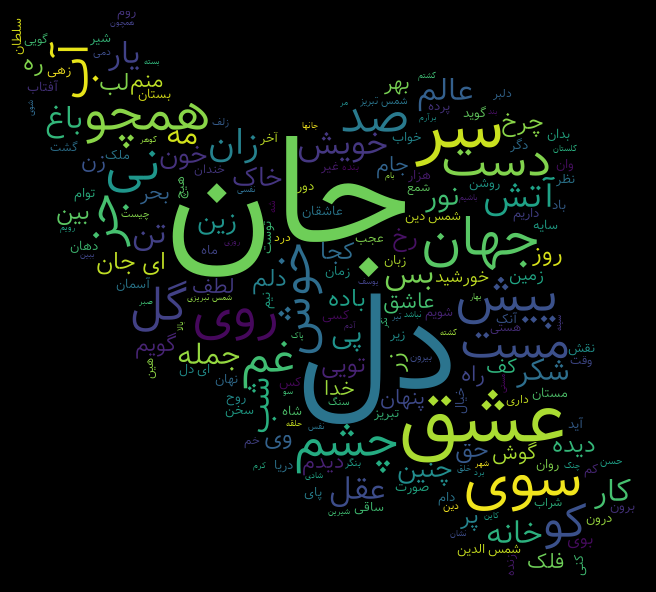

In [ ]:
image

### Declare some variables

In [ ]:
# Defining the window for context
window = 2
# Creating a placeholder for the scanning of the word list
word_lists = []

getting context words and main words:

In [ ]:
for i, word in enumerate(text):
  for w in range(window):
    # Getting the context that is ahead by *window* words
    if i + 1 + w < len(text): 
      word_lists.append([word] + [text[(i + 1 + w)]])
    # Getting the context that is behind by *window* words
    if i - w - 1 >= 0:
      word_lists.append([word] + [text[(i - w - 1)]])

A dictionary of unique words in corpus:

In [ ]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

### Cooking the model food

In [ ]:
unique_word_dict = create_unique_word_dict(text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

Making X and Y matrices

In [ ]:
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words, dtype=np.int8)
    Y_row = np.zeros(n_words, dtype=np.int8)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)


208770it [00:04, 46326.47it/s]


In [ ]:
X = np.array(X, dtype=np.int8)
Y = np.array(Y, dtype=np.int8)

## Training the Model

In [ ]:
from keras.models import Input, Model
from keras.layers import Dense

# Defining the size of the embedding (dimensions)
embed_size = 100

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10920)]           0         
                                                                 
 dense (Dense)               (None, 100)               1092100   
                                                                 
 dense_1 (Dense)             (None, 10920)             1102920   
                                                                 
Total params: 2,195,020
Trainable params: 2,195,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=512,
    epochs=16
    )

Epoch 1/16
408/408 [==============================] - 89s 216ms/step - loss: 8.1625 - categorical_accuracy: 0.0317
Epoch 2/16
408/408 [==============================] - 87s 213ms/step - loss: 7.8053 - categorical_accuracy: 0.0322
Epoch 3/16
408/408 [==============================] - 88s 216ms/step - loss: 7.7847 - categorical_accuracy: 0.0322
Epoch 4/16
408/408 [==============================] - 87s 213ms/step - loss: 7.7599 - categorical_accuracy: 0.0338
Epoch 5/16
408/408 [==============================] - 86s 212ms/step - loss: 7.7281 - categorical_accuracy: 0.0347
Epoch 6/16
408/408 [==============================] - 85s 209ms/step - loss: 7.6796 - categorical_accuracy: 0.0362
Epoch 7/16
408/408 [==============================] - 85s 209ms/step - loss: 7.6064 - categorical_accuracy: 0.0388
Epoch 8/16
408/408 [==============================] - 85s 209ms/step - loss: 7.5061 - categorical_accuracy: 0.0443
Epoch 9/16
408/408 [==============================] - 85s 209ms/step - loss: 7.3

In [ ]:
import tables
model.save("network.h5")

tables.file._open_files.close_all()

###Load model

In [ ]:
!curl -o network.h5 https://github.com/AmirHajimohamadi/nlp/raw/master/network.h5
from keras.models import load_model
model = load_model("network.h5")

###Obtaining the weights from the neural network

In [ ]:
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

### Achieve Cosine Similarity

This function will create a sorted dictionary of most similar vectors(words) with the value of similaritis.

NOTICE: The spatial.cosine.distance() function from the scipy module calculates the distance instead of the cosine similarity, but to achieve that, we can subtract the value of the distance from 1.

In [ ]:
from scipy import spatial

def near_words(word):
  word_dimensions = weights[unique_word_dict.get(word)]
  temp_dict = embedding_dict.copy()
  for word in words: 
      temp_dict.update({
          word: (1 - spatial.distance.cosine(word_dimensions , weights[unique_word_dict.get(word)]))
          })
  sorted_near_words = sorted(temp_dict.items(), key=lambda kv: kv[1], reverse = True)
  return sorted_near_words

In [ ]:
near_words("دشمن")

[('دشمن', 1.0),
 ('دوستکام', 0.6180450916290283),
 ('دشمنم', 0.606937825679779),
 ('صورم', 0.5832578539848328),
 ('ذوفنونم', 0.5685684084892273),
 ('محبت', 0.5601546168327332),
 ('لقمان', 0.5586869716644287),
 ('بیعشقی', 0.5575999021530151),
 ('چاشتم', 0.5535373687744141),
 ('رهیم', 0.539718508720398),
 ('غمهایی', 0.5335390567779541),
 ('سلامت', 0.5267650485038757),
 ('پرمهر', 0.5218495726585388),
 ('خسیس', 0.5123741030693054),
 ('ضد', 0.5017476677894592),
 ('کتاب', 0.4959045350551605),
 ('بامش', 0.49102339148521423),
 ('بااندازهات', 0.4900096654891968),
 ('آفت', 0.484821617603302),
 ('انگیز', 0.4813542366027832),
 ('اقراریم', 0.4793300926685333),
 ('زیرکسار', 0.4785609543323517),
 ('ننگ', 0.47619909048080444),
 ('تبه', 0.4756191372871399),
 ('برگزاریم', 0.4701760709285736),
 ('انداخته', 0.4696873724460602),
 ('فسوس', 0.46688878536224365),
 ('غلاف', 0.46620312333106995),
 ('املی', 0.4633590579032898),
 ('خریده', 0.45865970849990845),
 ('درربودم', 0.4586249887943268),
 ('گرگین', 0.45602

20 neighbors of 10 random words (first word is the chosen word)

In [ ]:
import random
for i in range(10):
  random_word = random.choice(list(unique_word_dict.keys()))
  neighbors = near_words(random_word)
  print(neighbors[0:19])
  if i != 9: print("NEXT WORD----------------------------")

[('بهشتم', 1.0), ('بدل', 0.9468671083450317), ('ثوابم', 0.8804362416267395), ('کیش', 0.8289033770561218), ('فتوح', 0.8146467804908752), ('فتوحم', 0.768086314201355), ('اسلم', 0.766749918460846), ('آگاهم', 0.7440525889396667), ('بوبک', 0.7405620217323303), ('صبوحم', 0.7253013253211975), ('عمل', 0.7147904634475708), ('سی', 0.701420783996582), ('دلربام', 0.6930797100067139), ('القلب', 0.6753135323524475), ('درودن', 0.6731040477752686), ('فلکیم', 0.6669403314590454), ('ملازم', 0.6561657786369324), ('نافع', 0.6559911966323853), ('مصحف', 0.6422165036201477)]
NEXT WORD----------------------------
[('فرمود', 1.0), ('بیگفت', 0.6296069622039795), ('سوره', 0.6078264117240906), ('قصهای', 0.5793396830558777), ('نامدی', 0.5721064805984497), ('نمردم', 0.5630098581314087), ('کهفم', 0.5461026430130005), ('بالذت', 0.5321905016899109), ('حریص', 0.5199543237686157), ('خطابت', 0.5134268999099731), ('قیمتم', 0.5121840238571167), ('بفرما', 0.5097918510437012), ('خونها', 0.506389856338501), ('جسمانیان', 0.506